In [28]:
import pylab as pl
import numpy as np
import math

In [29]:
h = 0.01
n = int(1 / h)
f = lambda x, y: -50 * y + 50 * x ** 2 + 2 * x

In [30]:
def E(f, x0, y0, h, N):
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    x[0] = x0
    y[0] = y0
    for i in range(N):
        x[i + 1] = x[i] + h
        y[i + 1] = y[i] + h * f(x[i], y[i])
    return x, y

In [31]:
def E_r(f, x0, y0, h, N):
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    x[0] = x0
    y[0] = y0
    for i in range(N):
        x[i + 1] = x[i] + h
        y_b = y[i] + h * f(x[i], y[i])
        y[i + 1] = y[i] + h / 2 * (f(x[i], y[i]) + f(x[i + 1], y_b))
    return x, y

In [34]:
def R_k(f, x0, y0, h, N):
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)
    x[0] = x0
    y[0] = y0
    for i in range(N):
        x[i + 1] = x[i] + h
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h / 2, y[i] + h / 2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + h / 6 * (k1 + k2 * 2 + k3 * 2 + k4)
    return x, y

In [35]:
[xx, yy] = E(f, 0, 1 / 3, h, n)
print(xx)
print(yy)
[xx_r, yy_r] = E_r(f, 0, 1 / 3, h, n)
print(yy_r)
[xx_R_k, yy_R_k] = R_k(f, 0, 1 / 3, h, n)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[0.33333333 0.16666667 0.08358333 0.04239167 0.02224583 0.01272292
 0.00861146 0.00730573 0.00750286 0.00855143 0.01012572 0.01206286
 0.01428143 0.01674071 0.01942036 0.02231018 0.02540509 0.02870254
 0.03220127 0.03590064 0.03980032 0.04390016 0.04820008 0.05270004
 0.05740002 0.06230001 0.0674     0.0727     0.0782     0.0839
 0.0898     0.0959     0.1022     0.1087     0.1154     0.1223
 0.1294     0.1367     0.1442     0.1519     0.1598     0.1679
 0.1762     0.1847     0.1934

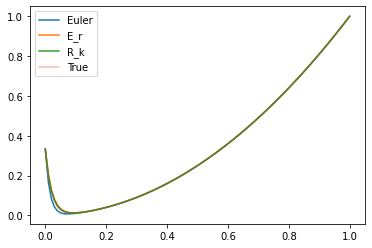

In [38]:
xxx = np.arange(0, 1 + h, h)
yyy = []
for i in xxx:
    yyy.append((math.e ** (-50 * i) / 3) + i ** 2)
pl.plot(xx, yy, label="Euler")
pl.plot(xx_r, yy_r, label="E_r")
pl.plot(xx_R_k, yy_R_k, label="R_k")
pl.plot(xxx, yyy, label="True", alpha=0.3)
pl.legend()